In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [12]:
csv = 'EBOV-Cyno-Aero-1.csv-Table 1.csv'

In [13]:
csv = 'default'

In [14]:
df = pd.read_csv(csv)

FileNotFoundError: [Errno 2] File b'default' does not exist: b'default'

# Get Summary Statistics

In [9]:
df.drop(['Day', 'TimeS'], axis=1).describe()

NameError: name 'df' is not defined

# Get Sampling Info for All of Subjects - Is it consistent?

In [10]:
def sampling_analysis(subject):
    df_subj = df[df['SubjectName'] == subject]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    num_days = len(np.unique(df_subj['Day']))
    first_exposed = df_subj.loc[df_subj.Y == 1]['TimeS'].to_list()[0]
    df_subj.plot(x='TimeS', y='Day', color='black', legend=False, subplots=True, ax=ax[0], rot=90)
    ax[0].plot([first_exposed, first_exposed], [0, num_days], lw=6, alpha=0.4, ls='--')
    ax[0].set_title("Days of Study, Reset at Exposure Period", fontsize=11)

    sampling_freqs = []
    exposed = []
    days = []

    for i in range(0, 2):
        for day in np.unique(df_subj.Day):
            num_obvs = len(df_subj.loc[df_subj.Y == i]
            .loc[df_subj.Day == day])
            days.append(day)
            exposed.append(i)
            sampling_freqs.append(num_obvs)

    sampling_freqs = pd.DataFrame(list(zip(days, exposed, sampling_freqs)), columns=['Day', 'Exposed', 'Sampling Frequency'])
    sampling_freqs = sampling_freqs[sampling_freqs['Sampling Frequency'] != 0]

    sampling_freqs.plot(y='Sampling Frequency', legend=False, color='black', subplots=True, ax=ax[1])
    exposed_start = sampling_freqs.loc[sampling_freqs['Exposed'] == 1].index[0]
    ax[1].plot([exposed_start, exposed_start], [0, max(sampling_freqs['Sampling Frequency'] + 5)], lw=4, alpha=0.4, ls='--')
    plt.xticks(rotation=90)
    plt.xlabel('Number of Days into Study')
    ax[1].set_title('Sampling Frequency Over Study on ' + subject, fontsize=11)

subjects = list(np.unique(df['SubjectName']))
for subject in subjects:
    sampling_analysis(subject)

NameError: name 'df' is not defined

In [14]:
time_steps = []
exposed_at = []

for subject in subjects:
    time_steps.append(max(df[df['SubjectName'] == subject]['TimeS']))
    exposed_at.append(min(df[(df['SubjectName'] == subject) & (df['Y'] == 1)]['TimeS']))

exposed_when = [i / j for i, j in zip(exposed_at, time_steps)]

length_exposed_df = pd.DataFrame(list(zip(subjects, time_steps, exposed_at, exposed_when)), columns=['SubjectName', 'Num_TimeS', 'TimeS_Exposed', 'StudyProgress_Exposed'])
length_exposed_df = length_exposed_df.set_index('SubjectName')
length_exposed_df

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
SubjectName,,,
e2002,1175400,579600,0.493109
e2003,1261800,583200,0.462197
e2006,1107000,585000,0.528455
e2007,1260000,594000,0.471429
e2010,1195200,603000,0.504518
e2012,1204200,622800,0.517190
e2013,1193400,595800,0.499246
e2014,1188000,613800,0.516667


In [15]:
length_exposed_df.describe()

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
count,8.000000e+00,8.00000,8.000000
mean,1.198125e+06,597150.00000,0.499101
std,4.909686e+04,15265.92845,0.022961
min,1.107000e+06,579600.00000,0.462197
25%,1.184850e+06,584550.00000,0.487689
50%,1.194300e+06,594900.00000,0.501882
75%,1.218150e+06,605700.00000,0.516797
max,1.261800e+06,622800.00000,0.528455


Text(0.5, 1.0, '# of Timesteps and Exposure Point for Each Subject')

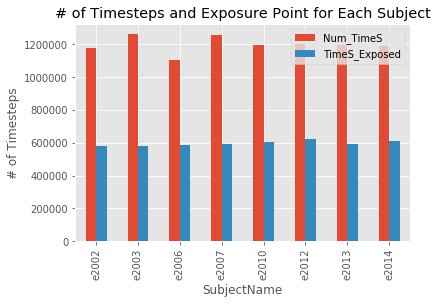

In [16]:
length_exposed_df.plot(y=['Num_TimeS', 'TimeS_Exposed'], kind='bar')
plt.ylabel('# of Timesteps')
plt.title('# of Timesteps and Exposure Point for Each Subject')
